## Task 2 (1)
print your student id, full and name below.

<sub>Expected answer</sub>
```
st124481
Thamakorn Kiattikaikul
```

In [1]:
# Your code here
print("st124481")
print("Thamakorn Kiattikaikul")

st124481
Thamakorn Kiattikaikul


## Task 3 (1)

Continue from the Task 1, show your current version of numpy, pandas, and sklearn

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt

print(f"     numpy version: {np.__version__}")
print(f"    pandas version: {pd.__version__}")
print(f"   sklearn version: {sklearn.__version__}")
print(f"matplotlib version: {mpl.__version__}")

     numpy version: 1.26.0
    pandas version: 1.5.3
   sklearn version: 1.3.1
matplotlib version: 3.8.0


## Task 4 (1)

Print a url to your `ait-ml-2023-midterm` image from `DockerHub`.

<sub>Expected answer</sub>
```
https://hub.docker.com/repository/xxxxxxxxxxxx
```

In [3]:
# Your code here
print("https://hub.docker.com/r/thamakorn/ait-ml-2023-midterm")

https://hub.docker.com/r/thamakorn/ait-ml-2023-midterm


## Task 5 (1)
So far so good?

In the folder `dataset`, there is a file `data.csv`.
Load the file into a `Pandas` dataframe.

Take a look at the data.
It supposes to **4** columns [y,x1,x2,x3] with 200 rows.

In [4]:
# load data from data.csv

df = pd.read_csv("data.csv")

In [5]:
#show data
df

,y,x1,x2,x3
0,1,20.83,6.80,40
1,1,22.05,2.26,40
2,0,14.33,2.27,30
3,1,22.80,6.96,30
4,0,10.78,0.39,40
...,...,...,...,...
195,0,10.75,4.95,40
196,1,24.56,1.45,20
197,1,10.83,9.90,20
198,1,11.20,8.93,40


## Task 6 (1)

Answer the following questions

1. What is the range of each columns (min, max)?
- Answer y =[0,1]
x1=[7.68,25.51]
x2=[0,9.96]
x3=[10,40]
2. Based on the value of each columns, which one is Discrete and which one is Category?
- Answer y and x3 are categories and x1,x2 are discrete
3. Based on the range of `y`, how many classes are there? and what are they?
- Answer 2 classes which are 0, and 1

In [6]:
#see the information of data
df.describe()


,y,x1,x2,x3
count,200.000000,200.000000,200.00000,200.000000
mean,0.500000,16.048350,5.25540,25.900000
std,0.501255,5.343838,3.00317,11.261622
min,0.000000,7.680000,0.00000,10.000000
25%,0.000000,11.535000,2.70750,20.000000
50%,0.500000,15.320000,5.34000,30.000000
75%,1.000000,20.490000,7.99500,40.000000
max,1.000000,25.510000,9.96000,40.000000


## Task 7 (1)

Plot three scatter plots.
- x1, x2 and color as y
- x1, x3 and color as y
- x2, x3 and color as y

<Axes: xlabel='x1', ylabel='x2'>

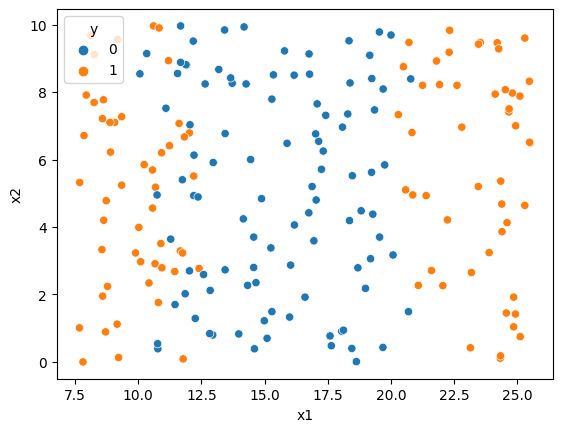

In [7]:
# Your code
import seaborn as sns
sns.scatterplot(x = df['x1'], y = df['x2'], hue=df['y'])

<Axes: xlabel='x1', ylabel='x3'>

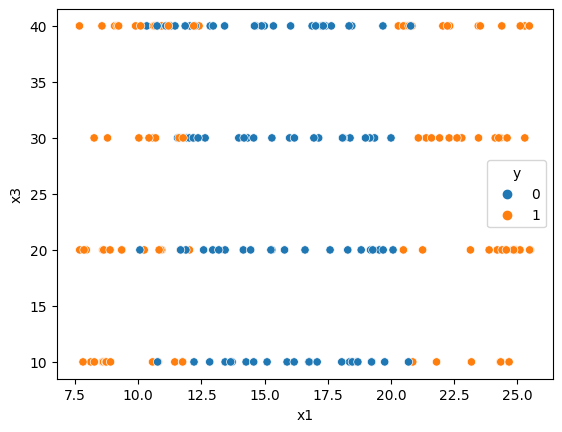

In [8]:
sns.scatterplot(x = df['x1'], y = df['x3'], hue=df['y'])

<Axes: xlabel='x2', ylabel='x3'>

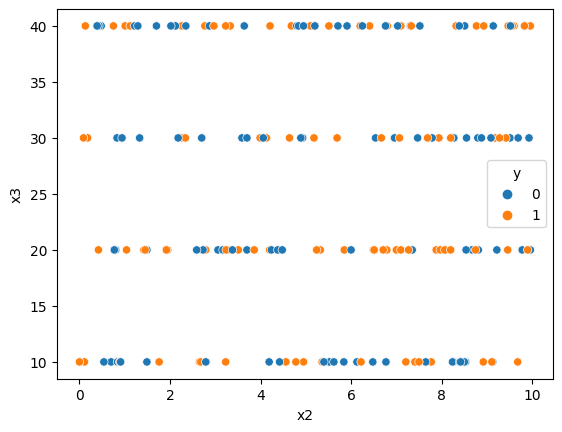

In [9]:
sns.scatterplot(x = df['x2'], y = df['x3'], hue=df['y'])

## Task 8 (10)

Perform Exploratory Data Analysis (EDA) on the Dataset.

At the end, report which feature and classifier is best. 
(explain as best as you can. short answer get 0.)


In [10]:
#look data in x3 that is imbalanced or not
df['x3'].value_counts()

40    58
20    52
30    46
10    44
Name: x3, dtype: int64

the data are balanced, so I don't need to balanced.

In [11]:
#since x3 is categories so I use one-hot encoding to encode x3
df = pd.get_dummies(df, columns=['x3'], drop_first=False)

In [12]:
df

,y,x1,x2,x3_10,x3_20,x3_30,x3_40
0,1,20.83,6.80,0,0,0,1
1,1,22.05,2.26,0,0,0,1
2,0,14.33,2.27,0,0,1,0
3,1,22.80,6.96,0,0,1,0
4,0,10.78,0.39,0,0,0,1
...,...,...,...,...,...,...,...
195,0,10.75,4.95,0,0,0,1
196,1,24.56,1.45,0,1,0,0
197,1,10.83,9.90,0,1,0,0
198,1,11.20,8.93,0,0,0,1


In [13]:
#1. You want to divide into categorical and numerical columns using select_dtypes
df.dtypes
num_col = df.select_dtypes(include=['int64', 'float64'])
# numcol = numcol.drop([]) #Loan_Status
cat_col = df.select_dtypes(exclude=['int64', 'float64'])
num_col.columns, cat_col.columns

(Index(['y', 'x1', 'x2'], dtype='object'),
 Index(['x3_10', 'x3_20', 'x3_30', 'x3_40'], dtype='object'))

<Axes: >

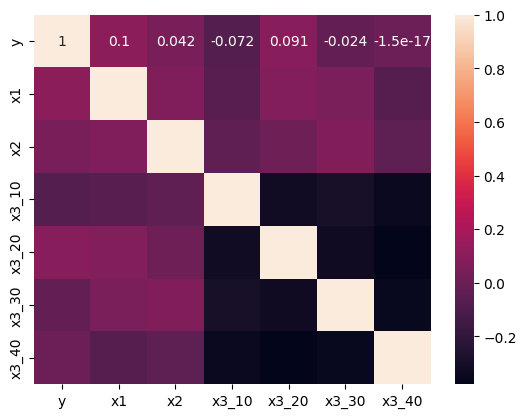

In [14]:
#use correlation matrix to find correlated features
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='x', ylabel='y'>

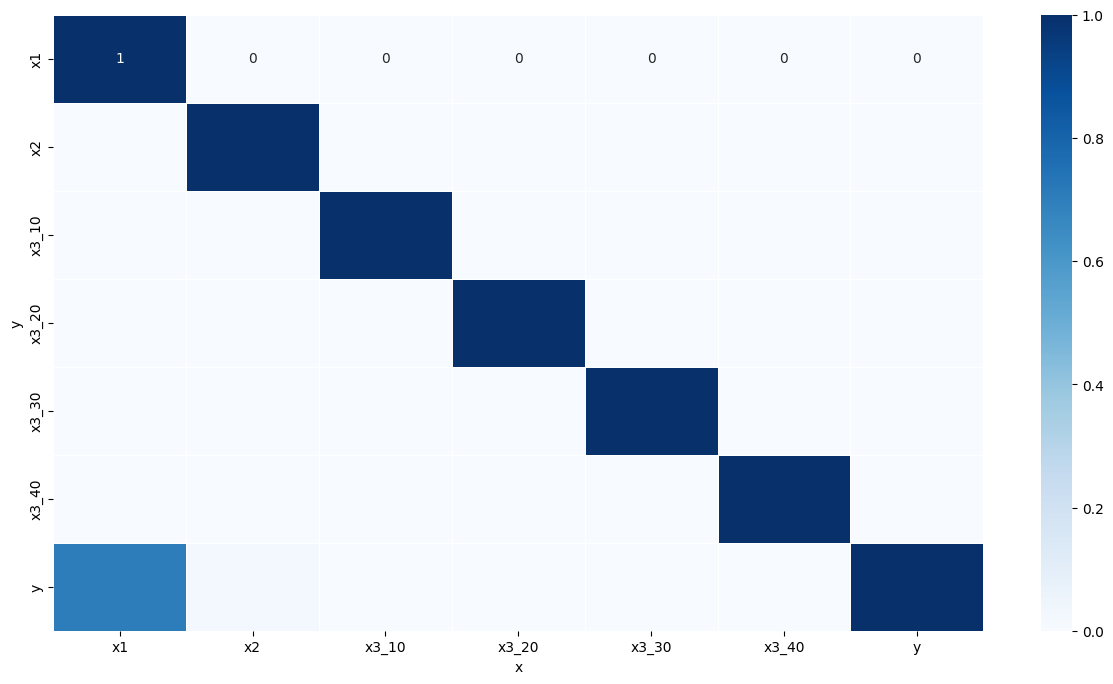

In [15]:
#use pps score to see what features are significant
import ppscore as pps


dfcopy = df.copy()

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

According to the graph above, you will see that x1 is crucial for predict y since x1 has high pss score for predict y.

## Task 9 (10)

Perform Preprocessing and Data splitting (80:20).

Argue your choice. (No explanation, no score.)

*<sub>Becareful with the data leakage and imbalance data when split.</sub>*

In [16]:
#to prevent data leakage, I will split data into train and test first
#x is our strong features
X = df[['x1', 'x2',  'x3_10','x3_20','x3_30','x3_40']]

#y is selling price column which I would like to predict
y = df["y"]

In [17]:
#split data 80:20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
#see number of x_train
X_train.count()

x1       160
x2       160
x3_10    160
x3_20    160
x3_30    160
x3_40    160
dtype: int64

In [19]:
#see number of y_test
y_test.count()

40

In [20]:
#check null values
df.isna().sum()

y        0
x1       0
x2       0
x3_10    0
x3_20    0
x3_30    0
x3_40    0
dtype: int64

There is no null values so I don't need to fill null values.

For scaling, I will not do it since there is x3 that is category feature so scaling will lose the category.

## Task 10 (10)

Perform model selection to find the best model that suited this dataset.

To save you from insanity, you don't need to perform `GridSearch`.

Validate the result using accuracy, precision-recall, f1-score, and confusion matrix.

Explain the result.

In [21]:
# Model to train. 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [22]:
#I select random_State to 999
lr = LogisticRegression(random_state=999)
gn = GaussianNB()
sv = SVC(random_state=999)
rf = RandomForestClassifier(random_state=999)



models = [lr, gn, sv,rf]

# perform cross validation using KFold
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits = 5, shuffle = True, random_state=999)

for model in models:
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')  #f1, recall, precision, accuracy
    print("Scores: ", score, "- Scores mean: ", score.mean(), "- Scores std (lower better): ", score.std())  #out of 1 ; 1 means perfect accuracy
    #lr, rf, sv



Scores:  [0.40625 0.53125 0.5625  0.5625  0.5    ] - Scores mean:  0.5125 - Scores std (lower better):  0.05796011559684815
Scores:  [0.65625 0.84375 0.8125  0.78125 0.65625] - Scores mean:  0.75 - Scores std (lower better):  0.07905694150420949
Scores:  [0.90625 0.8125  0.6875  0.84375 0.84375] - Scores mean:  0.81875 - Scores std (lower better):  0.0723489806424389
Scores:  [0.90625 0.90625 0.78125 0.84375 0.84375] - Scores mean:  0.85625 - Scores std (lower better):  0.046770717334674264


Random Forest is the best model for this dataset because it has the least stc score.

In [23]:
#after we get the best model, so we can find best parameters using grid search
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=999)  

param_grid = {'bootstrap': [True]
              } 


grid = GridSearchCV(model, param_grid, scoring="accuracy", cv=kfold, refit=True, return_train_score=True)
#scoring = f1, recall, precision, accuracy

#fit the grid, which will basically do cross validation across all combinatiosn, here we only have 3 comb
grid.fit(X_train, y_train)  

#print the best parameters and accuracy
# print(grid.best_params_)
# print(grid.best_score_)
print(grid.cv_results_)

{'mean_fit_time': array([0.19286504]), 'std_fit_time': array([0.01921403]), 'mean_score_time': array([0.01292124]), 'std_score_time': array([0.0014066]), 'param_bootstrap': masked_array(data=[True],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'bootstrap': True}], 'split0_test_score': array([0.90625]), 'split1_test_score': array([0.90625]), 'split2_test_score': array([0.78125]), 'split3_test_score': array([0.84375]), 'split4_test_score': array([0.84375]), 'mean_test_score': array([0.85625]), 'std_test_score': array([0.04677072]), 'rank_test_score': array([1], dtype=int32), 'split0_train_score': array([1.]), 'split1_train_score': array([1.]), 'split2_train_score': array([1.]), 'split3_train_score': array([1.]), 'split4_train_score': array([1.]), 'mean_train_score': array([1.]), 'std_train_score': array([0.])}


## Last Task (5)

- Export the file to PDF (4)
- Name the PDF using this format `<st12xxxx>-midterm.pdf` (1).
- Submit the PDF to the Moodle platform.

